In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import os
import seaborn as sns
%matplotlib inline
#os. getcwd()

Read Seattle and Boston listing.csv

In [2]:
seattle_listing = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\seattle\\listings.csv")
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [151]:
boston_listing = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\boston\\listings.csv")
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [152]:
print(boston_listing.shape)
print(seattle_listing.shape)

(3585, 95)
(3818, 92)


## 1. which neighbourhoods/areas are more popular?

In [4]:
#Remove the '$' and ',' in the price column for Seattle
seattle_listing['price'] = seattle_listing['price'].str.replace(',', '').str.replace('$', '').astype(float)

seattle_listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [153]:
#Remove the '$' and ',' in the price column for Boston
boston_listing['price'] = boston_listing['price'].str.replace(',', '').str.replace('$', '').astype(float)

boston_listing['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [5]:
#count the number of neighbourhoods in seattle listing file.
seattle_listing.groupby('neighbourhood').ngroups

81

In [154]:
#count the number of neighbourhoods in seattle listing file.
boston_listing.groupby('neighbourhood').ngroups

30

In [6]:
#get the top 15 popular neighbourhoods in Seattle by the number of listings in different neighbourhood
seattle_listing.groupby('neighbourhood')['price'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(15)

,mean,count
neighbourhood,,
Capitol Hill,126.433048,351
Ballard,123.615023,213
Belltown,166.627451,204
Minor,130.296875,192
Queen Anne,168.764706,187
Fremont,130.635135,148
Wallingford,131.335664,143
University District,95.420561,107
First Hill,136.085714,105


In [155]:
#get the top 15 popular neighbourhoods in Boston by the number of listings in different neighbourhood
boston_listing.groupby('neighbourhood')['price'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(15)

,mean,count
neighbourhood,,
Allston-Brighton,114.162088,364
Jamaica Plain,140.687898,314
South End,206.721477,298
Back Bay,245.457045,291
Fenway/Kenmore,230.104418,249
South Boston,232.120370,216
Dorchester,97.451282,195
Beacon Hill,212.080460,174
North End,195.512000,125


## 2. What time is most popular time in a year?
Use calendar.csv files in both cities to answser the qustion.

In [156]:
seattle_calendar = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\seattle\\calendar.csv")
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [157]:
boston_calendar = pd.read_csv("F:\\2020Study\\DS_NanoDegree\\Project1\\boston\\calendar.csv")
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [158]:
#Remove the '$' and ',' in the price column for both cities
seattle_calendar['price'] = seattle_calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)
boston_calendar['price'] = boston_calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)                                                                                                     

In [159]:
#Change listing_id column to be non numeric values
seattle_calendar['listing_id'] = seattle_calendar['listing_id'].astype(str)
boston_calendar['listing_id'] = boston_calendar['listing_id'].astype(str)

In [160]:
#drop nan values to remove dates when it's not available
seattle_calendar = seattle_calendar.dropna()
boston_calendar = boston_calendar.dropna()

In [28]:
seattle_calendar.describe()

,price
count,934542.000000
mean,137.944859
std,105.062870
min,10.000000
25%,75.000000
50%,109.000000
75%,160.000000
max,1650.000000


In [161]:
boston_calendar.describe()

,price
count,643037.000000
mean,198.438909
std,180.142913
min,11.000000
25%,85.000000
50%,150.000000
75%,255.000000
max,7163.000000


From price summaries for both cities, we can see that prices in Boston are higher than in Seattle.  

In [165]:
#Add month column so that we can aggregate at month level
seattle_calendar['month']=seattle_calendar['date'].apply(lambda x:x[:-3])
boston_calendar['month']=boston_calendar['date'].apply(lambda x:x[:-3])
seattle_month_price = seattle_calendar.groupby('month')['price'].mean().reset_index(name='Mean(Seattle)')
boston_month_price = boston_calendar.groupby('month')['price'].mean().reset_index(name='Mean(Boston)')

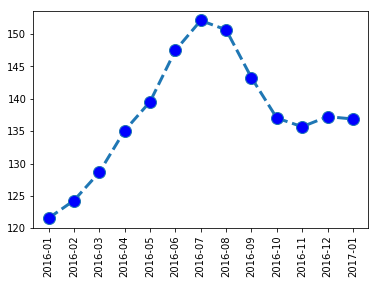

In [167]:
plt.plot(seattle_month_price['month'], seattle_month_price['Mean(Seattle)'],linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12);
plt.xticks(rotation=90);

The plot shows that in Seattle, average price in July and Augest are highest, implying that July and Augest are most popluar time in a year.

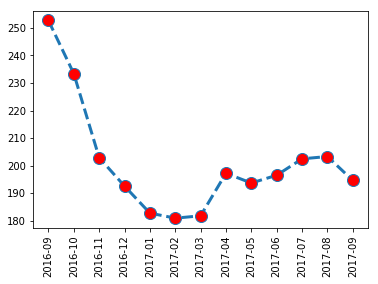

In [168]:
plt.plot(boston_month_price['month'], boston_month_price['Mean(Boston)'],linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=12);
plt.xticks(rotation=90);

However the plot for Boston tells a different story. September is most popular time in a year

In [170]:
#Create weekday column to see which weekday is most expensive
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
seattle_calendar['weekday'] = seattle_calendar['date'].dt.weekday_name
boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])
boston_calendar['weekday'] = boston_calendar['date'].dt.weekday_name

In [172]:
#get the average price acrossing different dates and highest average price
seattle_calendar.groupby('weekday')['price'].mean().reset_index(name='Mean(Seattle)').sort_values(by='Mean(Seattle)', ascending=False)

,weekday,Mean(Seattle)
2,Saturday,143.202136
0,Friday,143.036294
4,Thursday,136.476032
3,Sunday,136.459941
1,Monday,135.676414
6,Wednesday,135.447880
5,Tuesday,135.408764


The result above shows that in Seattle, on Saturday and Friday, AirBnb prices are higher than other weekdays. 

In [173]:
boston_calendar.groupby('weekday')['price'].mean().reset_index(name='Mean(Boston)').sort_values(by='Mean(Boston)', ascending=False)

,weekday,Mean(Boston)
2,Saturday,203.408387
0,Friday,203.121167
3,Sunday,198.219764
4,Thursday,198.073112
1,Monday,195.809561
6,Wednesday,195.418228
5,Tuesday,195.173842


Similarly, in Boston, Saturday and Friday prices are higher.

## 3. What factors affect listing price?
Will build a linear regression model using Seattle's data.

In [76]:
seattle_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [93]:
seattle_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [140]:
#define X and y for linear regression
df = seattle_listing[['price', 'property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms','security_deposit', 
                      'cleaning_fee', 'guests_included', 'review_scores_rating']]
df = df.dropna()
y = df['price']
X = df.drop(columns = ['price'])
X['security_deposit'] = X['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)
X['cleaning_fee'] = X['cleaning_fee'].str.replace(',', '').str.replace('$', '').astype(float)



In [174]:
#categorical variables
cat_cols = X.select_dtypes(include=['object']).copy().columns
#create dummy variables
for col in cat_cols:

    # for each cat add dummy var, drop original column
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)



In [175]:
#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression() 
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
#calculate Rsquared for the linear model
r2_score(y_test, y_test_preds)

0.6725227468472859

In [176]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(lm_model.coef_)})

In [181]:
coefficients.sort_values(by='Coefficients', ascending = False)

,Coefficients,Feature
8,2.882551e+02,property_type_Boat
9,4.489059e+01,property_type_Bungalow
1,4.325251e+01,bathrooms
2,2.388080e+01,bedrooms
14,1.354181e+01,property_type_Loft
12,1.195104e+01,property_type_Condominium
0,4.361277e+00,accommodates
5,3.296738e+00,guests_included
6,7.662608e-01,review_scores_rating
4,3.432912e-01,cleaning_fee


From the coefficients table above, property type as Boat/Bungalow, number of bathrooms, number of bedrooms will contribute more the higher prices.